<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Feature%20Selection%20Complete/Filter%20Methods/feature_selection_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selction using ML**

Univariate roc-auc or mse (or any other metric really)
This procedure works as follows:

First, it builds one decision tree per feature, to predict the target
Second, it makes predictions using the decision tree and the mentioned feature
Third, it measures the performance of that prediction, be it the roc-auc, the mse, or any other metric
Fourth, it ranks the features according to the machine learning metric (roc-auc or mse)
It selects the highest ranking features
Here, I will demonstrate how to select features based on univariate roc-auc or univariate mse.

We can use any ML model for this method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Data Science/Feature Selection/dataset_2.csv"

In [4]:
# Import the dataset
df = pd.read_csv(filename)
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [5]:
# Separate the data features and labels
X = df.drop(labels="target", axis=1)
y = df["target"]

In [6]:
# Separate the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## **Determine Univariate roc-auc**

In [8]:
roc_values = []

clf = DecisionTreeClassifier()


for feature in X_train.columns:
  clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

  y_scored = clf.predict_proba(X_test[feature].to_frame())

  roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

roc_values[0:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

In [9]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=True)
roc_values[0:10]

var_1     0.506925
var_2     0.500691
var_3     0.493145
var_4     0.503910
var_5     0.501435
var_6     0.502835
var_7     0.509523
var_8     0.506263
var_9     0.491346
var_10    0.506620
dtype: float64

<Axes: >

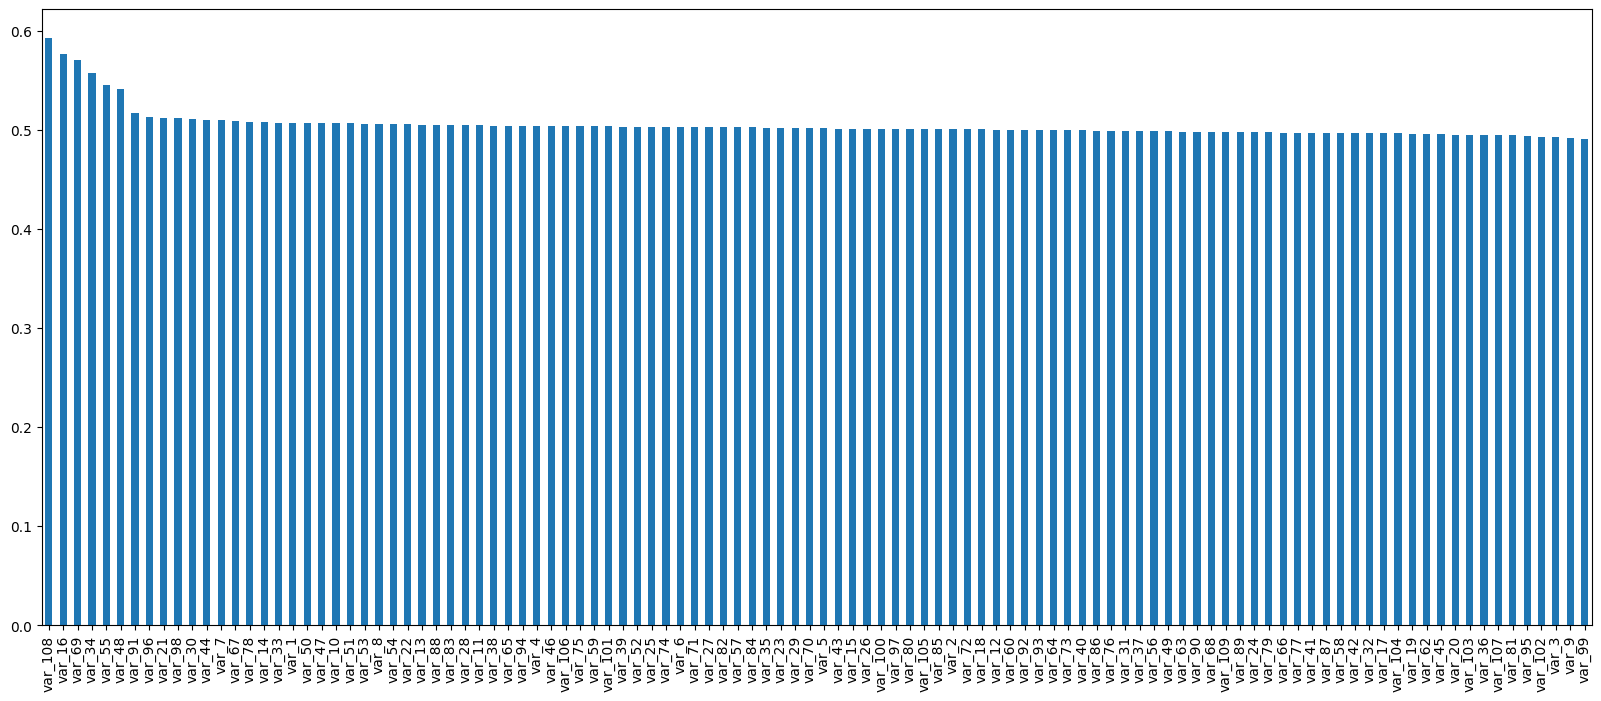

In [11]:
# Let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20,8))